# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [5]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
from scipy.stats import kde
# ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
#            "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
#            "cyan","khaki","lightcoral","gray"]
ColorsII = []
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
ColorsI = ["red","blue","green","purple",'C1','navy','darkred']
ColorsII = ['darkred','purple','green','blue']

In [6]:
# Low time precision
addressGev_LargeBox="./CSCS_Runs/Full_simulations_20March2019-9000Mpc/9000-cs_e4-w09-Kevolution////output/";
addressGev_Midrange="./CSCS_Runs/Full_simulations_20March2019-1280Mpc/1280-cs_e4-w09-Kevolution//output/";

zlist=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])
zrange=np.shape(zlist)[0]
Gev_lin_deltakess_z_all_low_9000=[]
Gev_lin_delta_m_zall_low_9000=[]
Gev_lin_phi_zall_low_9000=[]
Gev_lin_phi_prime_zall_low_9000=[]
# Gev_cross_zall=[]
# Gev_lin_phi_prime_zall

for i in range(zrange):
    Gev_lin_deltakess_z_all_low_9000.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_delta_kess.dat"))
#     Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_large"+str(i).zfill(3)+"_zeta.dat") )
#     Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_large"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall_low_9000.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall_low_9000.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall_low_9000.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi_prime.dat") )
#     Gev_lin_chi.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_large"+str(i).zfill(3)+"_chi.dat") )

Gev_lin_deltakess_z_all_low_1280=[]
Gev_lin_delta_m_zall_low_1280=[]
Gev_lin_phi_zall_low_1280=[]
Gev_lin_phi_prime_zall_low_1280=[]
for i in range(zrange):
    Gev_lin_deltakess_z_all_low_1280.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_delta_kess.dat"))
    Gev_lin_delta_m_zall_low_1280.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall_low_1280.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall_low_1280.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_phi_prime.dat") )
Class_pk_all=[]
Class_all=[]
Class_phi_prime=[]

zlist_class=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])

# zlist_phiprime=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
class_high="./Class_Gev_IC/class_cs02_w09//";

for i in range(np.shape(zlist_class)[0]):
    Class_all.append(np.loadtxt(class_high+"/Class_kess_cs_e2_w_09_z"+str(zlist_class[i])+"_newt.dat"))
    #     Class_pk_all.append(np.loadtxt(class_high+"/class_kess_cs_e3_newt_z"+str(i+1)+"_pk.dat"))
# for i in range(np.shape(zlist_phiprime)[0]):    
#     Class_phi_prime.append(np.loadtxt(class_high+"/Class_cs_e3_w0.9/Kessence_field_class_phi_prime_z"+str(zlist_phiprime[i])+".dat"))
maxNum=np.shape(zlist_class)[0]

z_list=zlist_class


In [7]:
# deltam_class=[]

# phi_class=[]

# deltakess_class=[]

# phi_prime_class=[]

# for i in range(0,zrange):
#     interp_class_deltam=(interp1d(Class_all[i][:,0],Class_all[i][:,6]) )

#     interp_class_phi=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )

#     interp_class_deltakess=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )


# #     interp_class_phi_prime=(interp1d(Class_phi_prime[i][:,0],Class_phi_prime[i][:,1]) )

#     deltam_class.append(interp_class_deltam(Gev_lin_deltakess_z_all_low_9000[i][:,0]))

#     phi_class.append(interp_class_phi(Gev_lin_deltakess_z_all_low_9000[i][:,0]))

#     deltakess_class.append(interp_class_deltakess(Gev_lin_deltakess_z_all_low_9000[i][:,0]))   
    
    
# for i in range(0,np.shape(zlist_phiprime)[0]):
#     interp_class_phi_prime=(interp1d(Class_phi_prime[i][:,0],Class_phi_prime[i][:,2]) )

#     phi_prime_class.append(interp_class_phi_prime(Gev_lin_deltakess_z_all_low_9000[i][:,0]))


In [8]:
# High time precision
addressGev_LargeBox="./CSCS_Runs/New_BackReaction_Precise_14July2019/BackReaction_TEST/kev_cs2_e4_9000////output/";
addressGev_Midrange="./CSCS_Runs/Full_simulations_20March2019-1280Mpc/1280-cs_e4-w09-Kevolution//output//";

zlist=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])
zrange=np.shape(zlist)[0]
Gev_lin_deltakess_z_all_high_9000=[]
# Gev_lin_chi_high_9000 = []
Gev_lin_delta_m_zall_high_9000=[]
Gev_lin_phi_zall_high_9000=[]
Gev_lin_phi_prime_zall_high_9000=[]
# Gev_cross_zall=[]
# Gev_lin_phi_prime_zall

for i in range(zrange):
    Gev_lin_deltakess_z_all_high_9000.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_delta_kess.dat"))
#     Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_zeta.dat") )
#     Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall_high_9000.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall_high_9000.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall_high_9000.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi_prime.dat") )
#     Gev_lin_chi.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_chi.dat") )
Gev_lin_deltakess_z_all_high_1280=[]
# Gev_lin_chi_high_9000 = []
Gev_lin_delta_m_zall_high_1280=[]
Gev_lin_phi_zall_high_1280=[]
Gev_lin_phi_prime_zall_high_1280=[]
for i in range(zrange):
    Gev_lin_deltakess_z_all_high_1280.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_delta_kess.dat"))
#     Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_zeta.dat") )
#     Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall_high_1280.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall_high_1280.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall_high_1280.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_phi_prime.dat") )
#     Gev_lin_chi.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_chi.dat") )



# Making mu

In [22]:
# As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
mu_class=[]
mukess_low_9000_cor1=[]
mukess_low_9000_cor2=[]
mukess_low_9000_cor3=[]
mukess_low_9000_cor4=[]

mu_phi_low_9000=[]
mu_kev_high_9000=[]
mu_class_kess=[]
mu_class_phi=[]
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
for i in range(zrange):
     #Hubble 9000 low, mu =1+ delta_kess/deltam + ...
    phi_kev=np.sqrt(Gev_lin_phi_zall_low_9000[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
    phi_dot_kev= -np.sqrt(Gev_lin_phi_prime_zall_low_9000[i][:,1]) # Phi' in kevolution (is negative according to CLASS)
    delta_m = -np.sqrt(Gev_lin_delta_m_zall_low_9000[i][:,1]) # (Negative according to CLASS )
    deltakess= -np.sqrt(Gev_lin_deltakess_z_all_low_9000[i][:,1]) #(Negative accrding to CLASS)
    # Reltivistic term = -2 * (1+ Omegakess/Omegam) (Phi'/Hconf +  Phi)/( deltam)
    Rel_term = 2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_dot_kev + phi_kev)/delta_m
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
#     Rel_term_all_kev.append(Rel_term);
    mu_kev0_core1=  1.+ (coeff*deltakess/delta_m) + Rel_term ;
    mu_kev0_core2 = 1.- (coeff*deltakess/delta_m) - Rel_term ;
    mu_kev0_core3 = 1.+ (coeff*deltakess/delta_m) - Rel_term ;
    mu_kev0_core4 = 1.- (coeff*deltakess/delta_m) + Rel_term ;

    mukess_low_9000_cor1.append(mu_kev0_core1)
    mukess_low_9000_cor2.append(mu_kev0_core2)
    mukess_low_9000_cor3.append(mu_kev0_core3)
    mukess_low_9000_cor4.append(mu_kev0_core4)

     #Hubble 9000 low, mu =phi/...
    phi_kev=np.sqrt(Gev_lin_phi_zall_low_9000[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
    delta_m = -np.sqrt(Gev_lin_delta_m_zall_low_9000[i][:,1]) # (Negative according to CLASS ) 
    coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
    mu2 =  coeff * Gev_lin_phi_zall_low_9000[i][:,0]**2 * np.sqrt(Gev_lin_phi_zall_low_9000[i][:,1]/Gev_lin_delta_m_zall_low_9000[i][:,1])
    mu_phi_low_9000.append(mu2)
    
    # CLASS
#     if i==8:
#             #CLASS
    #CLASS
#     # Only at z=0.00 Rel effects
#     if i == 8:
#         phi_prime_class_rel =phi_prime_class[8][:]  # Only at some redshifts not all of them Check zlist_phiprime
#         phi_class_rel=phi_class[i][:];
#         coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
#         Rel_class_z0d08 = 2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_prime_class_rel + phi_class_rel)/deltam_class[i][:]    
#         mu_class0=1.+(coeff*deltakess_class[i][:]/deltam_class[i][:]) + Rel_class_z0d08;
#         mu_class_kess.append(mu_class0);
#     if i == 9:
#         phi_prime_class_rel =phi_prime_class[9][:]  # Only at some redshifts not all of them Check zlist_phiprime
#         phi_class_rel=phi_class[i][:];
#         coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
#         Rel_class_z0d08 = 2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_prime_class_rel + phi_class_rel)/deltam_class[i][:]    
#         mu_class0=1.+(coeff*deltakess_class[i][:]/deltam_class[i][:]) + Rel_class_z0d08;
#         mu_class_kess.append(mu_class0);
#     if i == 30:
#         phi_prime_class_rel =phi_prime_class[11][:]  # Only at some redshifts not all of them Check zlist_phiprime
#         phi_class_rel=phi_class[i][:];
#         coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
#         Rel_class_z0d08 = 2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_prime_class_rel + phi_class_rel)/deltam_class[i][:]    
#         mu_class0=1.+(coeff*deltakess_class[i][:]/deltam_class[i][:]) + Rel_class_z0d08;
#         mu_class_kess.append(mu_class0);

#     ###############
#     ###############Mu 2
#     ###############
#     #CLASS
#     if i == 8:    
#         coeff=2. * (1.0 +a_list[i]**(-3.*w)*Omega_kessence/Omega_m) /(3.*Hubble_conf_Mpc(a_list[i])**2 )
#         mu_class0=-coeff * Gev_lin_phi_zall_low_9000[i][:,0]**2 * phi_class[i][:]/deltam_class[i][:]
#         mu_class_phi.append(mu_class0);
#     if i == 9:
#         coeff=2. * (1.0 +a_list[i]**(-3.*w)*Omega_kessence/Omega_m) /(3.*Hubble_conf_Mpc(a_list[i])**2 )
#         mu_class0=-coeff * Gev_lin_phi_zall_low_9000[i][:,0]**2 * phi_class[i][:]/deltam_class[i][:]
#         mu_class_phi.append(mu_class0);
#     if i == 30:
#         coeff=2. * (1.0 +a_list[i]**(-3.*w)*Omega_kessence/Omega_m) /(3.*Hubble_conf_Mpc(a_list[i])**2 )
#         mu_class0=-coeff * Gev_lin_phi_zall_low_9000[i][:,0]**2 * phi_class[i][:]/deltam_class[i][:]
#         mu_class_phi.append(mu_class0);
        

In [ ]:
# phi_class[8][:]
# # deltam_class[8][:]

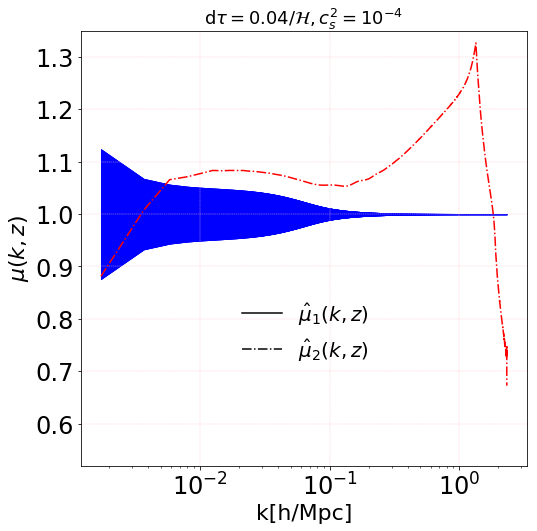

In [36]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
l=0
figs_label=[]
for i in [30]:
    #kevolution
    ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_phi_low_9000[i]*h*h,"-.",color=ColorsI[l],lw=1.5)
#     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mukess_low_9000_cor1[i],"-",color="yellow",lw=1.5,label="z="+str(z_list[i]) )
#     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mukess_low_9000_cor2[i],"-",color="orange",lw=1.5,label="z="+str(z_list[i]) )
#     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mukess_low_9000_cor3[i],"-",color="khaki",lw=1.5,label="z="+str(z_list[i]) )
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_low_9000_cor1[i], mukess_low_9000_cor2[i],color=ColorsI[l+1])
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_low_9000_cor1[i], mukess_low_9000_cor3[i],color=ColorsI[l+1])
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_low_9000_cor1[i], mukess_low_9000_cor4[i],color=ColorsI[l+1])
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_low_9000_cor2[i], mukess_low_9000_cor3[i],color=ColorsI[l+1])
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_low_9000_cor2[i], mukess_low_9000_cor4[i],color=ColorsI[l+1])
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_low_9000_cor3[i], mukess_low_9000_cor4[i],color=ColorsI[l+1])

    l=l+1
l=0
# for i in range(2):
# #     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_phi[i]*h*h,"-",color=ColorsI[l+2],lw=1.5)
#     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_kess[i],"-",color=ColorsI[l+2],lw=1.5)

#     l=l+1
ax.legend(bbox_to_anchor=(0.07, 0.49,0.32, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)

plt.ylabel(r"$\mu(k,z)$",fontsize=22)
plt.xlabel("k[h/Mpc]",fontsize=22)
ax.legend(bbox_to_anchor=(0.17, 0.89,0.32, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
# plt.yscale('symlog')
from matplotlib.legend import Legend
figs_label+=ax.plot(0,0,"-",color="black", markersize=12,label=r"Short-wave correcttion" ) 
figs_label+=ax.plot(0,0,"-.",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  
# figs_label+=ax.loglog(0,0,".-",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  

leg=Legend(ax,figs_label[:],[r"$\hat{\mu}_1(k,z)$ ","$\hat{\mu}_2(k,z)$"],bbox_to_anchor=(0.45, 0.32, 0.24, .102), loc=1, frameon=False,fontsize=20)# leg = Legend(ax, lines[2:], ['line C', 'line D'],
#              loc='lower right', frameon=False)
ax.add_artist(leg);
plt.title(r"d$ \tau = 0.04/\mathcal{H},c_s^2=10^{-4}$",fontsize=18)
# plt.ylim(4.e-11,1.5*1.e0)
# plt.xlim(0.00015,0.1)
plt.grid(color='pink', linestyle='dashed', linewidth=0.4)
# plt.xlim(0.001,0.1)
plt.ylim(0.52,1.35)


# plt.savefig('mu_1_mu_2_low_e4.pdf', format='pdf',dpi=300, bbox_inches='tight' )

plt.show()

In [26]:
# As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;

# mu_class_kess_1280=[]
# mu_class_phi_1280=[]

mukess_high_9000_cor1=[]
mukess_high_9000_cor2=[]
mukess_high_9000_cor3=[]
mukess_high_9000_cor4=[]
mu_phi_high_9000=[]

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
for i in range (zrange):
     #Hubble 9000 high, mu =1+ delta_kess/deltam + ...
    phi_kev=np.sqrt(Gev_lin_phi_zall_high_9000[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
    phi_dot_kev= -np.sqrt(Gev_lin_phi_prime_zall_high_9000[i][:,1]) # Phi' in kevolution (is negative according to CLASS)
    delta_m = -np.sqrt(Gev_lin_delta_m_zall_high_9000[i][:,1]) # (Negative according to CLASS )
    deltakess= -np.sqrt(Gev_lin_deltakess_z_all_high_9000[i][:,1]) #(Negative accrding to CLASS)
    # Reltivistic term = -2 * (1+ Omegakess/Omegam) (Phi'/Hconf +  Phi)/( deltam)
    Rel_term = 2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_dot_kev + phi_kev)/delta_m
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
#     Rel_term_all_kev.append(Rel_term);

    mu_kev0_core1=  1.+ (coeff*deltakess/delta_m) + Rel_term ;
    mu_kev0_core2 = 1.- (coeff*deltakess/delta_m) - Rel_term ;
    mu_kev0_core3 = 1.+ (coeff*deltakess/delta_m) - Rel_term ;
    mu_kev0_core4=  1.- (coeff*deltakess/delta_m) + Rel_term ;
    
    mukess_high_9000_cor1.append(mu_kev0_core1)
    mukess_high_9000_cor2.append(mu_kev0_core2)
    mukess_high_9000_cor3.append(mu_kev0_core3)
    mukess_high_9000_cor4.append(mu_kev0_core4)

#     mu_kev0=  1.+ (coeff*deltakess/delta_m) + Rel_term ; 
#     mukess_high_9000.append(mu_kev0)
    
     #Hubble 9000 high, mu =phi/...
    phi_kev=np.sqrt(Gev_lin_phi_zall_high_9000[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
    delta_m = -np.sqrt(Gev_lin_delta_m_zall_high_9000[i][:,1]) # (Negative according to CLASS ) 
    coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
    mu2 =  coeff * Gev_lin_phi_zall_high_9000[i][:,0]**2 * np.sqrt(Gev_lin_phi_zall_high_9000[i][:,1]/Gev_lin_delta_m_zall_high_9000[i][:,1])
    mu_phi_high_9000.append(mu2)
    


# Mu

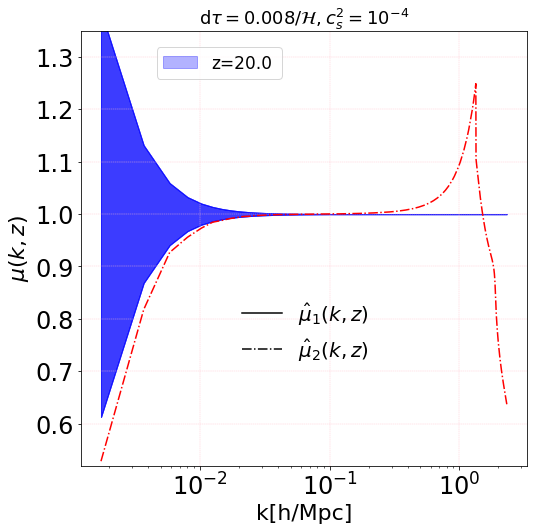

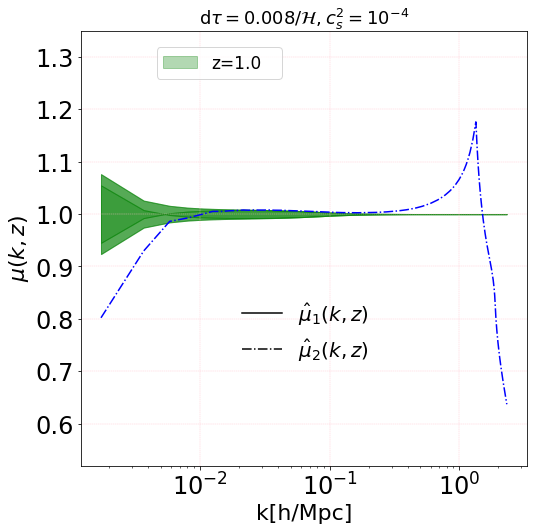

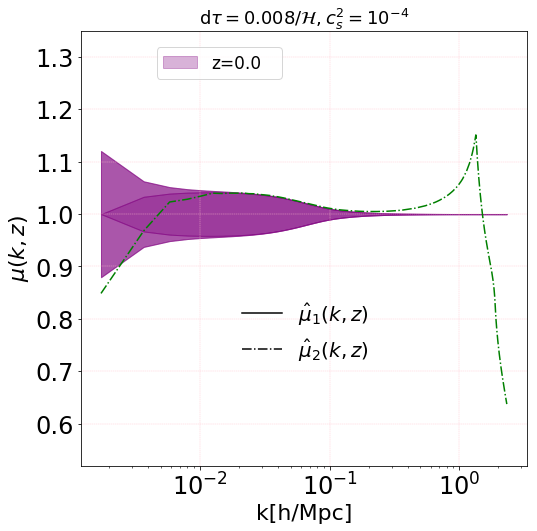

In [61]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####

l=0
figs_label=[]
for i in [2,9,30]:
    fig= plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
    plt.figure(1)
    #kevolution
    ax.semilogx(Gev_lin_phi_zall_high_9000[i][:,0],mu_phi_high_9000[i]*h*h,"-.",color=ColorsI[l],lw=1.5 )
#     ax.semilogx(Gev_lin_phi_zall_high_9000[i][:,0],mukess_high_9000[i],"-",color=ColorsI[l],lw=1.5,label="z="+str(z_list[i]) )
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_high_9000_cor1[i], mukess_high_9000_cor2[i],alpha=0.3,color=ColorsI[l+1],label="z="+str(z_list[i]))
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_high_9000_cor1[i], mukess_high_9000_cor3[i],alpha=0.3,color=ColorsI[l+1])
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_high_9000_cor1[i], mukess_high_9000_cor4[i],alpha=0.3,color=ColorsI[l+1])
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_high_9000_cor2[i], mukess_high_9000_cor3[i],alpha=0.3,color=ColorsI[l+1])
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_high_9000_cor2[i], mukess_high_9000_cor4[i],alpha=0.3,color=ColorsI[l+1])
    ax.fill_between(Gev_lin_phi_zall_low_9000[i][:,0], mukess_high_9000_cor3[i], mukess_high_9000_cor4[i],alpha=0.3,color=ColorsI[l+1])


    #ax.loglog(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000[i]),"-.",color=ColorsI[l],lw=1.5)
    l=l+1
# l=0
# for i in range(2,3):
# #     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_phi[i]*h*h,"-",color=ColorsI[l+2],lw=1.5)
#     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_kess[i],"-",color=ColorsI[l+1],lw=1.5)

#     l=l+1
    ax.legend(bbox_to_anchor=(0.17, 0.86,0.28, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
    # plt.yscale('symlog')
    plt.ylabel(r"$\mu(k,z)$",fontsize=22)
    plt.xlabel("k[h/Mpc]",fontsize=22)
    from matplotlib.legend import Legend
    figs_label+=ax.plot(0,0,"-",color="black", markersize=12,label=r"Short-wave correcttion" ) 
    figs_label+=ax.plot(0,0,"-.",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  
    # figs_label+=ax.loglog(0,0,".-",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  

    leg=Legend(ax,figs_label[:],[r"$\hat{\mu}_1(k,z)$ ","$\hat{\mu}_2(k,z)$"],bbox_to_anchor=(0.45, 0.32, 0.24, .102), loc=1, frameon=False,fontsize=20)# leg = Legend(ax, lines[2:], ['line C', 'line D'],
    #              loc='lower right', frameon=False)
    ax.add_artist(leg);
    plt.title(r"d$ \tau = 0.008/\mathcal{H},c_s^2=10^{-4}$",fontsize=18)
    # plt.ylim(4.e-11,1.5*1.e0)
    # plt.xlim(0.00015,0.1)
    plt.grid(color='pink', linestyle='dashed', linewidth=0.4)
    # plt.xlim(0.001,0.1)
    plt.ylim(0.52,1.35)

    # plt.savefig('mu_1_mu_2_high_cs_e4.pdf', format='pdf',dpi=300, bbox_inches='tight' )

    plt.show()

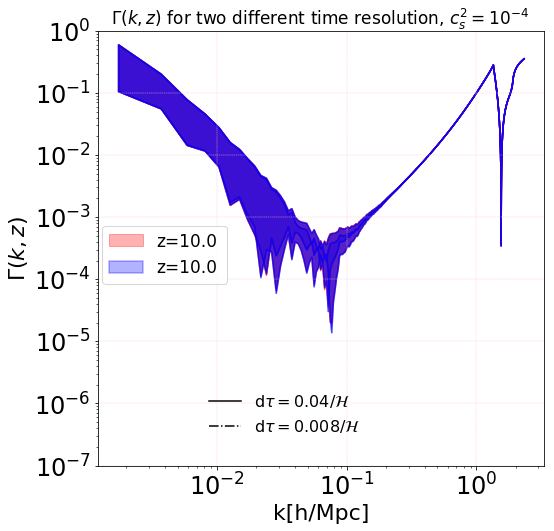

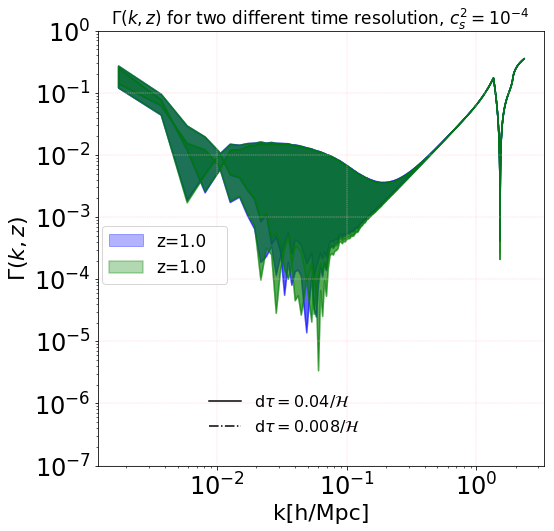

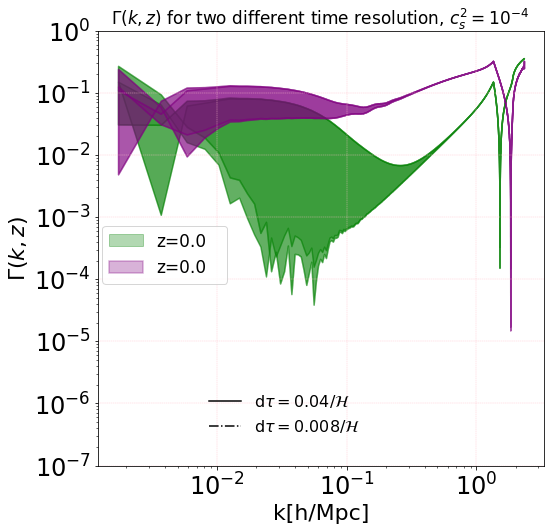

In [59]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
l=0
for i in [3,9,30]:
    fig= plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
    plt.figure(1)
    figs_label=[]
    #kevolution
    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor1[i]),np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor2[i]),color=ColorsI[l],alpha=0.3,label="z="+str(z_list[i]) )
    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor1[i]),np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor3[i]),color=ColorsI[l],alpha=0.2,lw=1.5)
    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor1[i]),np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor4[i]),alpha=0.3,color=ColorsI[l],lw=1.5 )
    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor2[i]),np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor3[i]),alpha=0.3,color=ColorsI[l],lw=1.5 )
    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor2[i]),np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor4[i]),alpha=0.3,color=ColorsI[l],lw=1.5 )
    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor3[i]),np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000_cor4[i]),alpha=0.3,color=ColorsI[l],lw=1.5 )

    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor1[i]),np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor2[i]),color=ColorsI[l+1],alpha=0.3,lw=1.5,label="z="+str(z_list[i]) )
    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor1[i]),np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor3[i]),alpha=0.3,color=ColorsI[l+1],lw=1.5 )
    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor1[i]),np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor4[i]),alpha=0.3,color=ColorsI[l+1],lw=1.5 )
    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor2[i]),np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor3[i]),alpha=0.3,color=ColorsI[l+1],lw=1.5 )
    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor2[i]),np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor4[i]),alpha=0.3,color=ColorsI[l+1],lw=1.5 )
    ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor3[i]),np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor4[i]),alpha=0.3,color=ColorsI[l+1],lw=1.5 )

    l=l+1
# l=0
# for i in range(2,3):
# #     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_phi[i]*h*h,"-",color=ColorsI[l+2],lw=1.5)
#     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_kess[i],"-",color=ColorsI[l+1],lw=1.5)

#     l=l+1
# ax.legend(bbox_to_anchor=(0.07, 0.49,0.32, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
# plt.yscale('symlog')
    plt.ylabel(r"$\Gamma(k,z)$",fontsize=22)
    plt.xlabel("k[h/Mpc]",fontsize=22)
    ax.legend(bbox_to_anchor=(0.01, 0.45,0.28, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
    # plt.yscale('symlog')
    plt.ylabel(r"$\Gamma(k,z)$",fontsize=22)
    plt.xlabel("k[h/Mpc]",fontsize=22)
    from matplotlib.legend import Legend
    figs_label+=ax.plot(0,0,"-",color="black", markersize=12,label=r"Short-wave correcttion" ) 
    figs_label+=ax.plot(0,0,"-.",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  
    # figs_label+=ax.loglog(0,0,".-",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  

    leg=Legend(ax,figs_label[:],[r"d$ \tau = 0.04/\mathcal{H}$ ",r"d$ \tau = 0.008/\mathcal{H}$"],bbox_to_anchor=(0.38, 0.1, 0.24, .102), loc=1, frameon=False,fontsize=16)# leg = Legend(ax, lines[2:], ['line C', 'line D'],
    #              loc='lower right', frameon=False)
    ax.add_artist(leg);
    # plt.title(r"d$ \tau = 0.04/\mathcal{H}$",fontsize=18)
    # plt.ylim(4.e-11,1.5*1.e0)
    # plt.xlim(0.00015,0.1)
    plt.grid(color='pink', linestyle='dashed', linewidth=0.4)
    # plt.xlim(0.001,0.1)
    plt.ylim(1.e-7,1.)
    plt.title(r"$\Gamma(k,z)$ for two different time resolution, $c_s^2=10^{-4}$ ",fontsize=17)

    plt.yscale('log')
    plt.xscale('log')

    # plt.savefig('gamma_time_resolution_cs2_e4.pdf', format='pdf',dpi=300, bbox_inches='tight' )

    plt.show()

In [ ]:
# deltam_class_1280=[]

# phi_class_1280=[]

# deltakess_class_1280=[]

# phi_prime_class_1280=[]

# for i in range(0,zrange):
#     interp_class_deltam=(interp1d(Class_all[i][:,0],Class_all[i][:,6]) )

#     interp_class_phi=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )

#     interp_class_deltakess=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )


# #     interp_class_phi_prime=(interp1d(Class_phi_prime[i][:,0],Class_phi_prime[i][:,1]) )

#     deltam_class_1280.append(interp_class_deltam(Gev_lin_deltakess_z_all_low_1280[i][:,0]))

#     phi_class_1280.append(interp_class_phi(Gev_lin_deltakess_z_all_low_1280[i][:,0]))
#     deltakess_class_1280.append(interp_class_deltakess(Gev_lin_deltakess_z_all_low_1280[i][:,0]))   
# for i in range(0,np.shape(zlist_phiprime)[0]):
#     interp_class_phi_prime=(interp1d(Class_phi_prime[i][:,0],Class_phi_prime[i][:,2]) )

#     phi_prime_class_1280.append(interp_class_phi_prime(Gev_lin_deltakess_z_all_low_1280[i][:,0]))


# Making mu2

In [62]:
# As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
mu_class=[]
mukess_low_1280_cor1=[]
mukess_low_1280_cor2=[]
mukess_low_1280_cor3=[]
mukess_low_1280_cor4=[]
mu_phi_low_1280=[]
mu_kev_low_1280=[]
mu_class_kess=[]
mu_class_phi=[]
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
for i in range(zrange):
     #Hubble 1280 low, mu =1+ delta_kess/deltam + ...
    phi_kev=np.sqrt(Gev_lin_phi_zall_low_1280[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
    phi_dot_kev= -np.sqrt(Gev_lin_phi_prime_zall_low_1280[i][:,1]) # Phi' in kevolution (is negative according to CLASS)
    delta_m = -np.sqrt(Gev_lin_delta_m_zall_low_1280[i][:,1]) # (Negative according to CLASS )
    deltakess= -np.sqrt(Gev_lin_deltakess_z_all_low_1280[i][:,1]) #(Negative accrding to CLASS)
    # Reltivistic term = -2 * (1+ Omegakess/Omegam) (Phi'/Hconf +  Phi)/( deltam)
    Rel_term = 2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_dot_kev + phi_kev)/delta_m
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
#     Rel_term_all_kev.append(Rel_term);
#     mu_kev0=  1.+ (coeff*deltakess/delta_m) + Rel_term ; 
    
    mu_kev0_core1=  1.+ (coeff*deltakess/delta_m) + Rel_term ;
    mu_kev0_core2 = 1.- (coeff*deltakess/delta_m) - Rel_term ;
    mu_kev0_core3 = 1.+ (coeff*deltakess/delta_m) - Rel_term ;
    mu_kev0_core4 = 1.- (coeff*deltakess/delta_m) + Rel_term ;

    mukess_low_1280_cor1.append(mu_kev0_core1)
    mukess_low_1280_cor2.append(mu_kev0_core2)
    mukess_low_1280_cor3.append(mu_kev0_core3)
    mukess_low_1280_cor4.append(mu_kev0_core4)

#     mukess_low_1280.append(mu_kev0)
    
     #Hubble 1280 low, mu =phi/...
    phi_kev=np.sqrt(Gev_lin_phi_zall_low_1280[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
    delta_m = -np.sqrt(Gev_lin_delta_m_zall_low_1280[i][:,1]) # (Negative according to CLASS ) 
    coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
    mu2 =  coeff * Gev_lin_phi_zall_low_1280[i][:,0]**2 * np.sqrt(Gev_lin_phi_zall_low_1280[i][:,1]/Gev_lin_delta_m_zall_low_1280[i][:,1])
    mu_phi_low_1280.append(mu2)


In [68]:
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# ####
# fig= plt.figure(figsize=(8,8))
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.figure(1)
# l=0
# figs_label=[]
# for i in [1,2,30]:
#     #kevolution
# #     ax.loglog(Gev_lin_phi_zall_low_1280[i][:,0],np.abs(mu_phi_low_1280[i]*h*h-mukess_low_1280[i]),".-",color=ColorsI[l],lw=1.5,label="z="+str(z_list[i]) )
# #     ax.loglog(Gev_lin_phi_zall_low_1280[i][:,0],np.abs(mu_phi_low_1280[i]*h*h-mukess_low_9000[i]),"-.",color=ColorsI[l],lw=1.5)
#     ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_1280[i]*h*h-mukess_low_1280_cor1[i]),np.abs(mu_phi_low_1280[i]*h*h-mukess_low_1280_cor1[i]),color=ColorsI[l+1],alpha=0.3,lw=1.5,label="z="+str(z_list[i]) )
#     ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_1280[i]*h*h-mukess_low_1280_cor1[i]),np.abs(mu_phi_low_1280[i]*h*h-mukess_low_1280_cor1[i]),color=ColorsI[l+1],alpha=0.3,lw=1.5,label="z="+str(z_list[i]) )

# #     ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_1280[i]*h*h-mukess_low_1280_cor1[i]),np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor3[i]),alpha=0.3,color=ColorsI[l+1],lw=1.5 )
# #     ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_1280[i]*h*h-mukess_low_9000_cor1[i]),np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor4[i]),alpha=0.3,color=ColorsI[l+1],lw=1.5 )
# #     ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_1280[i]*h*h-mukess_low_9000_cor2[i]),np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor3[i]),alpha=0.3,color=ColorsI[l+1],lw=1.5 )
# #     ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_1280[i]*h*h-mukess_low_9000_cor2[i]),np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor4[i]),alpha=0.3,color=ColorsI[l+1],lw=1.5 )
# #     ax.fill_between(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_low_1280[i]*h*h-mukess_low_9000_cor3[i]),np.abs(mu_phi_low_9000[i]*h*h-mukess_low_9000_cor4[i]),alpha=0.3,color=ColorsI[l+1],lw=1.5 )

#     l=l+1
# l=0
# # for i in range(2,3):
# # #     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_phi[i]*h*h,"-",color=ColorsI[l+2],lw=1.5)
# #     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_kess[i],"-",color=ColorsI[l+1],lw=1.5)

# #     l=l+1
# ax.legend(bbox_to_anchor=(0.37, 0.89,0.32, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
# # plt.yscale('symlog')
# plt.ylabel(r"$\Gamma(k,z)$",fontsize=22)
# plt.xlabel("k[h/Mpc]",fontsize=22)
# # from matplotlib.legend import Legend
# # figs_label+=ax.loglog(0,0,"-",color="black", markersize=12,label=r"Short-wave correcttion" ) 
# # figs_label+=ax.loglog(0,0,"-.",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  
# # figs_label+=ax.loglog(0,0,".-",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  

# # leg=Legend(ax,figs_label[:],[r"$k$-essence density","Relativistic correction","Short-wave correction"],bbox_to_anchor=(0.75, 0.32, 0.24, .102), loc=1, frameon=False,fontsize=16)# leg = Legend(ax, lines[2:], ['line C', 'line D'],
# # #              loc='lower right', frameon=False)
# # ax.add_artist(leg);
# # plt.ylim(4.e-11,1.5*1.e0)
# # plt.xlim(0.00015,0.1)
# # plt.grid(color='pink', linestyle='dashed', linewidth=0.4)
# # plt.xlim(0.001,0.1)
# # plt.ylim(0.8,1.2)
# plt.yscale('log')
# plt.xscale('log')

# # plt.savefig('Numerical_noise.pdf', format='pdf',dpi=300, bbox_inches='tight' )

# plt.show()

# Precise 1280

In [69]:
# # As=2.215*1.e-9;
# h=0.67556;
# kp=0.05/h; 
# ns=0.9619;
# cs2_e3=1.e-7;
# c=2.99792458*1.e5; #Km/s
# H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# # print("H0[1/Mpc]=100h/c: ",H0);
# w=-0.9;
# def Hubble_conf_Mpc(a):
#     c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
#     Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
#     Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
#     Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
#     return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
# Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
# Omega_m=Omega_b + Omega_cdm;

# # for i in range (maxNum-1,maxNum):
# Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
# Omega_m=Omega_b + Omega_cdm;
# Omega_rad=9.1671353942930788e-05
# Omega_kessence=1.-Omega_m-Omega_rad
# mu_class=[]
# mukess_high_1280=[]
# mu_phi_high_1280=[]
# mu_kev_high_1280=[]
# mu_class_kess=[]
# mu_class_phi=[]
# w=-0.9;
# a_list=1./(1.+zlist)
# H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
# for i in range(zrange):
#      #Hubble 1280 high, mu =1+ delta_kess/deltam + ...
#     phi_kev=np.sqrt(Gev_lin_phi_zall_high_1280[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
#     phi_dot_kev= -np.sqrt(Gev_lin_phi_prime_zall_high_1280[i][:,1]) # Phi' in kevolution (is negative according to CLASS)
#     delta_m = -np.sqrt(Gev_lin_delta_m_zall_high_1280[i][:,1]) # (Negative according to CLASS )
#     deltakess= -np.sqrt(Gev_lin_deltakess_z_all_high_1280[i][:,1]) #(Negative accrding to CLASS)
#     # Reltivistic term = -2 * (1+ Omegakess/Omegam) (Phi'/Hconf +  Phi)/( deltam)
#     Rel_term = 2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_dot_kev + phi_kev)/delta_m
#     coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
# #     Rel_term_all_kev.append(Rel_term);
#     mu_kev0=  1.+ (coeff*deltakess/delta_m) + Rel_term ; 
#     mukess_high_1280.append(mu_kev0)
    
#      #Hubble 1280 high, mu =phi/...
#     phi_kev=np.sqrt(Gev_lin_phi_zall_high_1280[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
#     delta_m = -np.sqrt(Gev_lin_delta_m_zall_high_1280[i][:,1]) # (Negative according to CLASS ) 
#     coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
#     mu2 =  coeff * Gev_lin_phi_zall_high_1280[i][:,0]**2 * np.sqrt(Gev_lin_phi_zall_high_1280[i][:,1]/Gev_lin_delta_m_zall_high_1280[i][:,1])
#     mu_phi_high_1280.append(mu2)


In [70]:
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# ####
# fig= plt.figure(figsize=(8,8))
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.figure(1)
# l=0
# figs_label=[]
# for i in [1,2,30]:
#     #kevolution
#     ax.loglog(Gev_lin_phi_zall_low_1280[i][:,0],np.abs(mu_phi_low_1280[i]*h*h-mukess_low_1280[i]),".",color=ColorsI[l],lw=1.5,label="z="+str(z_list[i]) )
#     ax.loglog(Gev_lin_phi_zall_low_1280[i][:,0],np.abs(mu_phi_high_1280[i]*h*h-mukess_high_9000[i]),"-",color=ColorsI[l],lw=1.5)
#     l=l+1
# l=0
# # for i in range(2,3):
# # #     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_phi[i]*h*h,"-",color=ColorsI[l+2],lw=1.5)
# #     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_kess[i],"-",color=ColorsI[l+1],lw=1.5)

# #     l=l+1
# ax.legend(bbox_to_anchor=(0.07, 0.49,0.32, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
# # plt.yscale('symlog')
# plt.ylabel(r"$\mu(k,z)$",fontsize=22)
# plt.xlabel("k[h/Mpc]",fontsize=22)
# # from matplotlib.legend import Legend
# # figs_label+=ax.loglog(0,0,"-",color="black", markersize=12,label=r"Short-wave correcttion" ) 
# # figs_label+=ax.loglog(0,0,"-.",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  
# # figs_label+=ax.loglog(0,0,".-",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  

# # leg=Legend(ax,figs_label[:],[r"$k$-essence density","Relativistic correction","Short-wave correction"],bbox_to_anchor=(0.75, 0.32, 0.24, .102), loc=1, frameon=False,fontsize=16)# leg = Legend(ax, lines[2:], ['line C', 'line D'],
# # #              loc='lower right', frameon=False)
# # ax.add_artist(leg);
# # plt.ylim(4.e-11,1.5*1.e0)
# # plt.xlim(0.00015,0.1)
# # plt.grid(color='pink', linestyle='dashed', linewidth=0.4)
# # plt.xlim(0.001,0.1)
# # plt.ylim(0.8,1.2)

# # plt.savefig('Numerical_noise.pdf', format='pdf',dpi=300, bbox_inches='tight' )

# plt.show()

# Very large Boxsize Sim

In [71]:
addressGev_LargeBox="./CSCS_Runs/Simulation-kev-90000-26March2019/90000-cs_e4-w09-Kevolution///output/";
addressGev_Midrange="./CSCS_Runs/New_BackReaction_Precise_14July2019/BackReaction_TEST/kev_cs2_e4_90000///output//";

zlist=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])
zrange=np.shape(zlist)[0]
Gev_lin_deltakess_z_all_low_hub=[]
# Gev_lin_chi_high_9000 = []
Gev_lin_delta_m_zall_low_hub=[]
Gev_lin_phi_zall_low_hub=[]
Gev_lin_phi_prime_zall_low_hub=[]
# Gev_cross_zall=[]
# Gev_lin_phi_prime_zall

for i in range(zrange):
    Gev_lin_deltakess_z_all_low_hub.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_delta_kess.dat"))
#     Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_zeta.dat") )
#     Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall_low_hub.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall_low_hub.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall_low_hub.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_mid"+str(i).zfill(3)+"_phi_prime.dat") )
#     Gev_lin_chi.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_chi.dat") )
Gev_lin_deltakess_z_all_high_hub=[]
# Gev_lin_chi_high_9000 = []
Gev_lin_delta_m_zall_high_hub=[]
Gev_lin_phi_zall_high_hub=[]
Gev_lin_phi_prime_zall_high_hub=[]
for i in range(zrange):
    Gev_lin_deltakess_z_all_high_hub.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e4_w09_Hubble"+str(i).zfill(3)+"_delta_kess.dat"))
#     Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_zeta.dat") )
#     Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall_high_hub.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e4_w09_Hubble"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall_high_hub.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e4_w09_Hubble"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall_high_hub.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e4_w09_Hubble"+str(i).zfill(3)+"_phi_prime.dat") )
#     Gev_lin_chi.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_chi.dat") )



In [74]:
# As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
mu_class=[]
mukess_low_hub=[]
mu_phi_low_hub=[]

mukess_high_cor1=[]
mukess_high_cor2=[]
mukess_high_cor3=[]
mukess_high_cor4=[]

mukess_low_hub_cor1=[]
mukess_low_hub_cor2=[]
mukess_low_hub_cor3=[]
mukess_low_hub_cor4=[]

mu_phi_high=[]
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
for i in range(zrange):
     #Hubble Hubble low, mu =1+ delta_kess/deltam + ...
    phi_kev=np.sqrt(Gev_lin_phi_zall_low_hub[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
    phi_dot_kev= -np.sqrt(Gev_lin_phi_prime_zall_low_hub[i][:,1]) # Phi' in kevolution (is negative according to CLASS)
    delta_m = -np.sqrt(Gev_lin_delta_m_zall_low_hub[i][:,1]) # (Negative according to CLASS )
    deltakess= -np.sqrt(Gev_lin_deltakess_z_all_low_hub[i][:,1]) #(Negative accrding to CLASS)
    # Reltivistic term = -2 * (1+ Omegakess/Omegam) (Phi'/Hconf +  Phi)/( deltam)
    Rel_term = 2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_dot_kev + phi_kev)/delta_m
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
#     Rel_term_all_kev.append(Rel_term);
#     mu_kev0=  1.+ (coeff*deltakess/delta_m) + Rel_term ; 
    mu_kev0_core1=  1.+ (coeff*deltakess/delta_m) + Rel_term ;
    mu_kev0_core2 = 1.- (coeff*deltakess/delta_m) - Rel_term ;
    mu_kev0_core3 = 1.+ (coeff*deltakess/delta_m) - Rel_term ;
    mu_kev0_core4 = 1.- (coeff*deltakess/delta_m) + Rel_term ;

    mukess_low_hub_cor1.append(mu_kev0_core1)
    mukess_low_hub_cor2.append(mu_kev0_core2)
    mukess_low_hub_cor3.append(mu_kev0_core3)
    mukess_low_hub_cor4.append(mu_kev0_core4)
#     mukess_low_hub.append(mu_kev0)
    
     #Hubble Hubble low, mu =phi/...
    phi_kev=np.sqrt(Gev_lin_phi_zall_low_hub[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
    delta_m = -np.sqrt(Gev_lin_delta_m_zall_low_hub[i][:,1]) # (Negative according to CLASS ) 
    coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
    mu2 =  coeff * Gev_lin_phi_zall_low_hub[i][:,0]**2 * np.sqrt(Gev_lin_phi_zall_low_hub[i][:,1]/Gev_lin_delta_m_zall_low_hub[i][:,1])
    mu_phi_low_hub.append(mu2)

mukess_high=[]
mu_phi_high=[]

for i in range(zrange):
     #Hubble Hubble high, mu =1+ delta_kess/deltam + ...
    phi_kev=np.sqrt(Gev_lin_phi_zall_high_hub[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
    phi_dot_kev= -np.sqrt(Gev_lin_phi_prime_zall_high_hub[i][:,1]) # Phi' in kevolution (is negative according to CLASS)
    delta_m = -np.sqrt(Gev_lin_delta_m_zall_high_hub[i][:,1]) # (Negative according to CLASS )
    deltakess= -np.sqrt(Gev_lin_deltakess_z_all_high_hub[i][:,1]) #(Negative accrding to CLASS)
    # Reltivistic term = -2 * (1+ Omegakess/Omegam) (Phi'/Hconf +  Phi)/( deltam)
    Rel_term = 2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_dot_kev + phi_kev)/delta_m
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
#     Rel_term_all_kev.append(Rel_term);
    mu_kev0_core1=  1.+ (coeff*deltakess/delta_m) + Rel_term ;
    mu_kev0_core2 = 1.- (coeff*deltakess/delta_m) - Rel_term ;
    mu_kev0_core3 = 1.+ (coeff*deltakess/delta_m) - Rel_term ;
    mu_kev0_core4 = 1.- (coeff*deltakess/delta_m) + Rel_term ;

    mukess_high_cor1.append(mu_kev0_core1)
    mukess_high_cor2.append(mu_kev0_core2)
    mukess_high_cor3.append(mu_kev0_core3)
    mukess_high_cor4.append(mu_kev0_core4)
#     mu_kev0=  1.+ (coeff*deltakess/delta_m) + Rel_term ; 
#     mukess_high.append(mu_kev0)
    
     #Hubble Hubble high, mu =phi/...
    phi_kev=np.sqrt(Gev_lin_phi_zall_high_hub[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
    delta_m = -np.sqrt(Gev_lin_delta_m_zall_high_hub[i][:,1]) # (Negative according to CLASS ) 
    coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
    mu2 =  coeff * Gev_lin_phi_zall_high_hub[i][:,0]**2 * np.sqrt(Gev_lin_phi_zall_high_hub[i][:,1]/Gev_lin_delta_m_zall_high_hub[i][:,1])
    mu_phi_high.append(mu2)


/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in sqrt
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in sqrt


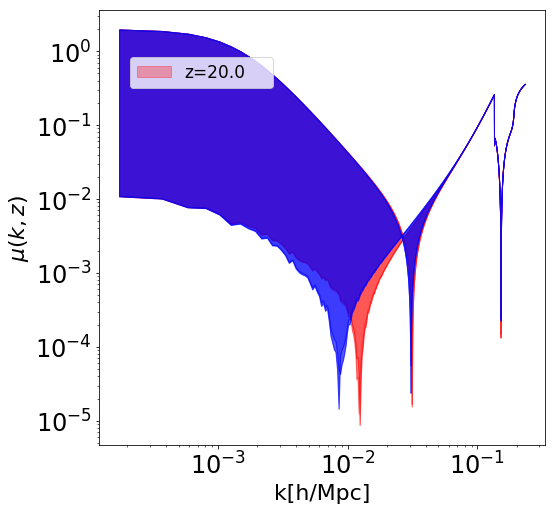

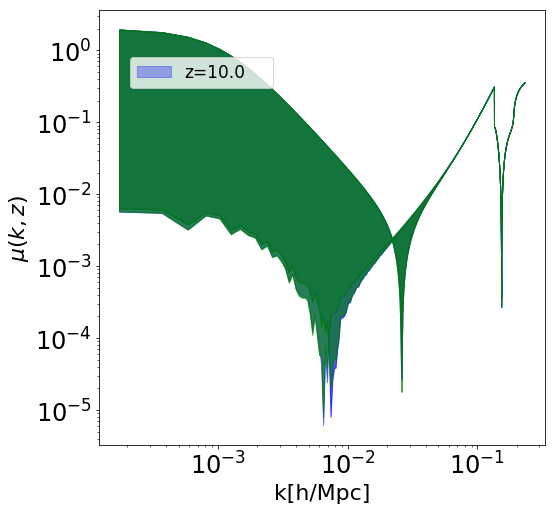

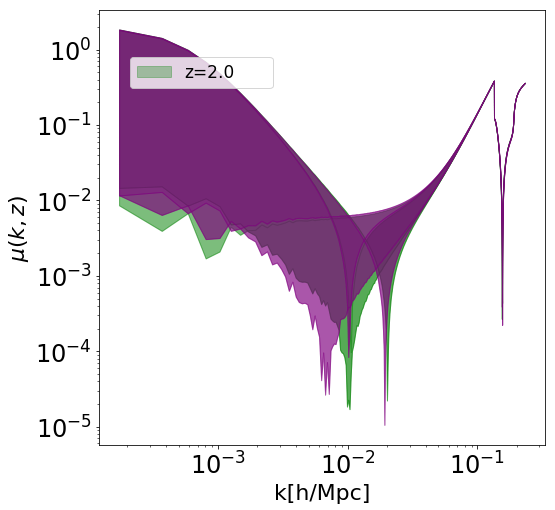

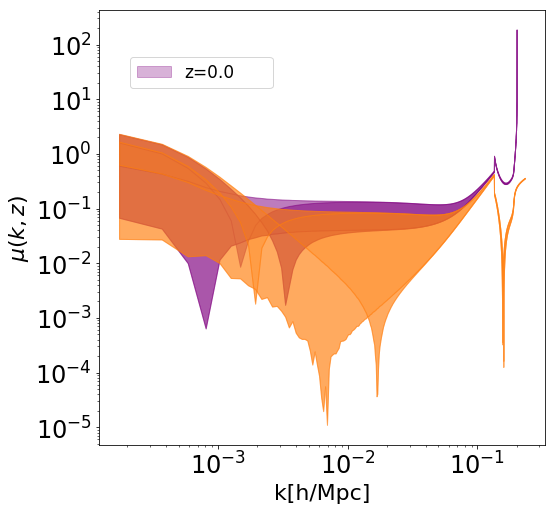

In [81]:

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####

l=0
figs_label=[]
for i in [2,3,8,30]:
    fig= plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
    plt.figure(1)
    #kevolution
    ax.fill_between(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub_cor1[i]),np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub_cor2[i]),color=ColorsI[l],alpha=0.3,label="z="+str(z_list[i]) )
    ax.fill_between(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub_cor1[i]),np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub_cor3[i]),color=ColorsI[l],alpha=0.3 )
    ax.fill_between(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub_cor1[i]),np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub_cor4[i]),color=ColorsI[l],alpha=0.3 )
    ax.fill_between(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub_cor2[i]),np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub_cor3[i]),color=ColorsI[l],alpha=0.3 )
    ax.fill_between(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub_cor3[i]),np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub_cor4[i]),color=ColorsI[l],alpha=0.3 )

    ax.fill_between(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_high[i]*h*h-mukess_high_cor1[i]),np.abs(mu_phi_high[i]*h*h-mukess_high_cor2[i]),color=ColorsI[l+1],alpha=0.3)
    ax.fill_between(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_high[i]*h*h-mukess_high_cor1[i]),np.abs(mu_phi_high[i]*h*h-mukess_high_cor3[i]),color=ColorsI[l+1],alpha=0.3)
    ax.fill_between(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_high[i]*h*h-mukess_high_cor1[i]),np.abs(mu_phi_high[i]*h*h-mukess_high_cor4[i]),color=ColorsI[l+1],alpha=0.3)
    ax.fill_between(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_high[i]*h*h-mukess_high_cor2[i]),np.abs(mu_phi_high[i]*h*h-mukess_high_cor3[i]),color=ColorsI[l+1],alpha=0.3)
    ax.fill_between(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_high[i]*h*h-mukess_high_cor2[i]),np.abs(mu_phi_high[i]*h*h-mukess_high_cor4[i]),color=ColorsI[l+1],alpha=0.3)
    ax.fill_between(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_high[i]*h*h-mukess_high_cor3[i]),np.abs(mu_phi_high[i]*h*h-mukess_high_cor4[i]),color=ColorsI[l+1],alpha=0.3)

#     ax.loglog(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_high[i]*h*h-mukess_high[i]),"-",color=ColorsI[l],lw=1.5)
    l=l+1
# l=0
# for i in range(2,3):
# #     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_phi[i]*h*h,"-",color=ColorsI[l+2],lw=1.5)
#     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_kess[i],"-",color=ColorsI[l+1],lw=1.5)

#     l=l+1
    ax.legend(bbox_to_anchor=(0.07, 0.79,0.32, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
    # plt.yscale('symlog')
    plt.ylabel(r"$\mu(k,z)$",fontsize=22)
    plt.xlabel("k[h/Mpc]",fontsize=22)
    plt.yscale('log')
    plt.xscale('log')
    # from matplotlib.legend import Legend
# figs_label+=ax.loglog(0,0,"-",color="black", markersize=12,label=r"Short-wave correcttion" ) 
# figs_label+=ax.loglog(0,0,"-.",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  
# figs_label+=ax.loglog(0,0,".-",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  

# leg=Legend(ax,figs_label[:],[r"$k$-essence density","Relativistic correction","Short-wave correction"],bbox_to_anchor=(0.75, 0.32, 0.24, .102), loc=1, frameon=False,fontsize=16)# leg = Legend(ax, lines[2:], ['line C', 'line D'],
# #              loc='lower right', frameon=False)
# ax.add_artist(leg);
# plt.ylim(4.e-11,1.5*1.e0)
# plt.xlim(0.00015,0.1)
# plt.grid(color='pink', linestyle='dashed', linewidth=0.4)
# plt.xlim(0.001,0.1)
# plt.ylim(0.8,1.2)

# plt.savefig('Numerical_noise.pdf', format='pdf',dpi=300, bbox_inches='tight' )

    plt.show()

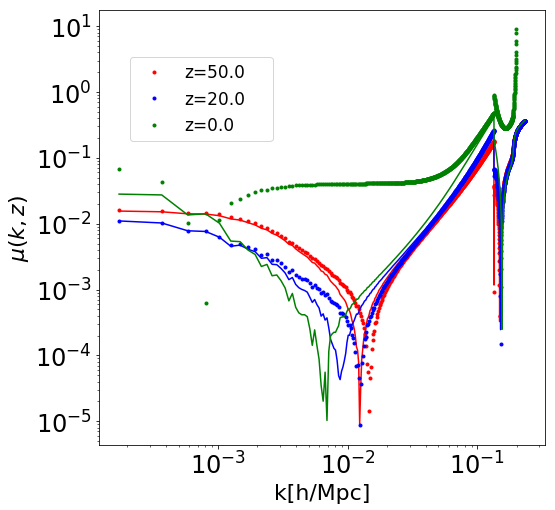

In [158]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
l=0
figs_label=[]
for i in [1,2,30]:
    #kevolution
#     ax.loglog(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub[i]))
#     ax.loglog(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_low_hub[i]*h*h-mukess_low_hub[i]),".",color=ColorsI[l],lw=1.5,label="z="+str(zlist[i]) )
#     ax.loglog(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_high[i]*h*h-mukess_high[i]),"-",color=ColorsI[l],lw=1.5)
    l=l+1
l=0
# for i in range(2,3):
# #     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_phi[i]*h*h,"-",color=ColorsI[l+2],lw=1.5)
#     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_kess[i],"-",color=ColorsI[l+1],lw=1.5)

#     l=l+1
ax.legend(bbox_to_anchor=(0.07, 0.79,0.32, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
# plt.yscale('symlog')
plt.ylabel(r"$\mu(k,z)$",fontsize=22)
plt.xlabel("k[h/Mpc]",fontsize=22)
# from matplotlib.legend import Legend
# figs_label+=ax.loglog(0,0,"-",color="black", markersize=12,label=r"Short-wave correcttion" ) 
# figs_label+=ax.loglog(0,0,"-.",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  
# figs_label+=ax.loglog(0,0,".-",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  

# leg=Legend(ax,figs_label[:],[r"$k$-essence density","Relativistic correction","Short-wave correction"],bbox_to_anchor=(0.75, 0.32, 0.24, .102), loc=1, frameon=False,fontsize=16)# leg = Legend(ax, lines[2:], ['line C', 'line D'],
# #              loc='lower right', frameon=False)
# ax.add_artist(leg);
# plt.ylim(4.e-11,1.5*1.e0)
# plt.xlim(0.00015,0.1)
# plt.grid(color='pink', linestyle='dashed', linewidth=0.4)
# plt.xlim(0.001,0.1)
# plt.ylim(0.8,1.2)

# plt.savefig('Numerical_noise.pdf', format='pdf',dpi=300, bbox_inches='tight' )

plt.show()

# Resolution study

NameError: name 'mukess_high_9000' is not defined

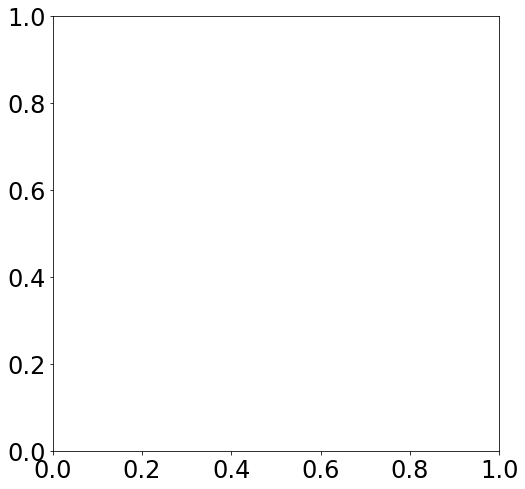

In [66]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
l=0
figs_label=[]
for i in [9,18,30]:
    #kevolution
    ax.loglog(Gev_lin_phi_zall_high_9000[i][:,0],np.abs(mu_phi_high_9000[i]*h*h-mukess_high_9000[i]),"-",color=ColorsI[l],lw=1.5,label="z="+str(z_list[i]) )
    ax.loglog(Gev_lin_phi_zall_low_hub[i][:,0],np.abs(mu_phi_high[i]*h*h-mukess_high[i]),"-.",color=ColorsI[l],lw=1.5)
    l=l+1
l=0
# for i in range(2,3):
# #     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_phi[i]*h*h,"-",color=ColorsI[l+2],lw=1.5)
#     ax.semilogx(Gev_lin_phi_zall_low_9000[i][:,0],mu_class_kess[i],"-",color=ColorsI[l+1],lw=1.5)

#     l=l+1
# ax.legend(bbox_to_anchor=(0.07, 0.49,0.32, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
# plt.yscale('symlog')
plt.ylabel(r"$\Gamma(k,z)$",fontsize=22)
plt.xlabel("k[h/Mpc]",fontsize=22)
ax.legend(bbox_to_anchor=(0.01, 0.35,0.32, .102), loc=1,ncol=1,fontsize=17, mode="expand", borderaxespad=0.)
# plt.yscale('symlog')
plt.ylabel(r"$\Gamma(k,z)$",fontsize=22)
plt.xlabel("k[h/Mpc]",fontsize=22)
from matplotlib.legend import Legend
figs_label+=ax.plot(0,0,"-",color="black", markersize=12,label=r"Short-wave correcttion" ) 
figs_label+=ax.plot(0,0,"-.",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  
# figs_label+=ax.loglog(0,0,".-",color="black", markersize=12,label=r"$\frac{P^{(L)}}{P^{(NL)}}<1$" )  

leg=Legend(ax,figs_label[:],[r"$L=9000 \,\rm{Mpc}\, h^{-1} $, $N_{grid} = 3840^3$ ",r"$L=90000 \,\rm{Mpc}\, h^{-1} $, $N_{grid} = 3840^3$"],bbox_to_anchor=(0.48, 0.1, 0.24, .102), loc=1, frameon=False,fontsize=16)# leg = Legend(ax, lines[2:], ['line C', 'line D'],
#              loc='lower right', frameon=False)
ax.add_artist(leg);
# plt.title(r"d$ \tau = 0.04/\mathcal{H}$",fontsize=18)
# plt.ylim(4.e-11,1.5*1.e0)
# plt.xlim(0.00015,0.1)
plt.grid(color='pink', linestyle='dashed', linewidth=0.4)
# plt.xlim(0.001,0.1)
plt.ylim(2.e-7,0.5)

plt.title(r"$\Gamma(k,z)$ for two different spatial resolution, $c_s^2=10^{-4}$ ",fontsize=17)
plt.savefig('gamma_resolution_study_cs_e4.pdf', format='pdf',dpi=300, bbox_inches='tight' )

plt.show()